In [1]:
%load_ext autoreload
%autoreload 2

In [98]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

import constants
import data_api

In [ ]:
# df = data_api.load_recent_data()
# df.to_csv('data/2017.csv')

In [66]:
date_fields = ['closed_date', 'created_date', 'due_date']
df_orig = pd.read_csv('data/2017.csv', index_col=0, parse_dates=date_fields)
df = df_orig
df.head()

/Users/mike/.envs/nyc311/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (18,20,22,25,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,school_state,school_zip,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,vehicle_type,x_coordinate_state_plane,y_coordinate_state_plane
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,Unspecified,Unspecified,Closed,WEST 139 STREET,NaN,NaN,35138739,NaN,997914.0,238598.0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,Unspecified,Unspecified,Closed,SHERIDAN AVENUE,NaN,NaN,35138744,NaN,1007483.0,243416.0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,Unspecified,Unspecified,Closed,8 AVENUE,NaN,NaN,35138750,NaN,989096.0,180375.0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,Unspecified,Unspecified,Closed,EAST GUN HILL ROAD,NaN,NaN,35138751,NaN,1021584.0,258791.0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,Unspecified,Unspecified,Closed,54 PLACE,NaN,NaN,35138763,NaN,1008949.0,199513.0


In [ ]:
# df[[18, 20, 22, 25, 50]].head()

In [67]:
df_orig.incident_zip.describe()

count     572273.0
unique       652.0
top        11226.0
freq        7666.0
Name: incident_zip, dtype: float64

In [68]:
agency_dummies = pd.get_dummies(df[constants.AGENCY])
# agency_dummies.head()
df = pd.concat([df, agency_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,NYCHA,NYCOOA,NYPD,OATH,OCME,OEC,OPA,OPS,SBS,TLC
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,0,0,1,0,0,0,0,0,0,0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,0,0,1,0,0,0,0,0,0,0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,0,0,1,0,0,0,0,0,0,0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,0,0,1,0,0,0,0,0,0,0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,0,0,1,0,0,0,0,0,0,0


In [69]:
# Rules
# xxxxx-xxxx --> int(xxxxx)
# strings --> null
# Float --> int
# fill left with 0's to len=5
def clean_zips(zip):
    zip = str(zip).replace('.0', '')[:5]
    try:
        zip = int(zip)
    except ValueError:
        return None
    return '{:05}'.format(zip)
    
df['incident_zip'] = df.incident_zip.apply(clean_zips)

# for zip in df.incident_zip.unique():
#     print(zip)

In [70]:
pd.get_dummies(df['incident_zip'].astype(str), prefix='zip').head()

,zip_00000,zip_00011,zip_00083,zip_02062,zip_02298,zip_05620,zip_06460,zip_06840,zip_06870,zip_06901,...,zip_85285,zip_89117,zip_90054,zip_91203,zip_91942,zip_92131,zip_97062,zip_97526,zip_98036,zip_None
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
zip_dummies = pd.get_dummies(df['incident_zip'], prefix='zip')
df = pd.concat([df, zip_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,zip_85016,zip_85285,zip_89117,zip_90054,zip_91203,zip_91942,zip_92131,zip_97062,zip_97526,zip_98036
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,0,0,0,0,0,0,0,0,0,0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,0,0,0,0,0,0,0,0,0,0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,0,0,0,0,0,0,0,0,0,0


In [220]:
# Generate dummies for time of day
df['created_hr_of_day'] = df['created_date'].dt.hour
hour_of_day_dummies = pd.get_dummies(df['created_hr_of_day'])
df = pd.concat([df, hour_of_day_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,complaint_type,created_date,cross_street_1,cross_street_2,descriptor,due_date,facility_type,ferry_direction,ferry_terminal_name,garage_lot_name,incident_address,incident_zip,intersection_street_1,intersection_street_2,landmark,latitude,location,location_type,longitude,park_borough,park_facility_name,resolution_action_updated_date,resolution_description,road_ramp,school_address,school_city,school_code,school_name,school_not_found,school_number,school_phone_number,school_region,school_state,school_zip,status,street_name,taxi_company_borough,taxi_pick_up_location,unique_key,vehicle_type,x_coordinate_state_plane,y_coordinate_state_plane,3-1-1,ACS,CHALL,COIB,DCA,DCP,DEP,DFTA,DHS,DOB,DOE,DOF,DOHMH,DOITT,DOP,DOT,DPR,DSNY,DVS,EDC,FDNY,FUND,HPD,HRA,MOIA,MOPD,NYCEM,NYCERS,NYCHA,NYCOOA,NYPD,OATH,OCME,OEC,OPA,OPS,SBS,TLC,zip_00000,zip_00011,zip_00083,zip_02062,zip_02298,zip_05620,zip_06460,zip_06840,zip_06870,zip_06901,zip_07002,zip_07013,zip_07020,zip_07030,zip_07040,zip_07047,zip_07054,zip_07078,zip_07087,zip_07090,zip_07093,zip_07094,zip_07102,zip_07103,zip_07105,zip_07114,zip_07201,zip_07205,zip_07310,zip_07601,zip_07621,zip_07640,zip_07649,zip_07660,zip_07670,zip_07714,zip_08876,zip_10000,zip_10001,zip_10002,zip_10003,zip_10004,zip_10005,zip_10006,zip_10007,zip_10009,zip_10010,zip_10011,zip_10012,zip_10013,zip_10014,zip_10016,zip_10017,zip_10018,zip_10019,zip_10020,zip_10021,zip_10022,zip_10023,zip_10024,zip_10025,zip_10026,zip_10027,zip_10028,zip_10029,zip_10030,zip_10031,zip_10032,zip_10033,zip_10034,zip_10035,zip_10036,zip_10037,zip_10038,zip_10039,zip_10040,zip_10041,zip_10044,zip_10045,zip_10055,zip_10065,zip_10069,zip_10070,zip_10075,zip_10101,zip_10103,zip_10105,zip_10106,zip_10107,zip_10110,zip_10111,zip_10112,zip_10115,zip_10118,zip_10119,zip_10120,zip_10121,zip_10122,zip_10123,zip_10128,zip_10138,zip_10151,zip_10152,zip_10153,zip_10154,zip_10155,zip_10158,zip_10162,zip_10165,zip_10166,zip_10167,zip_10168,zip_10169,zip_10170,zip_10171,zip_10172,zip_10173,zip_10174,zip_10176,zip_10178,zip_10179,zip_10271,zip_10276,zip_10278,zip_10279,zip_10280,zip_10281,zip_10282,zip_10301,zip_10302,zip_10303,zip_10304,zip_10305,zip_10306,zip_10307,zip_10308,zip_10309,zip_10310,zip_10312,zip_10314,zip_10451,zip_10452,zip_10453,zip_10454,zip_10455,zip_10456,zip_10457,zip_10458,zip_10459,zip_10460,zip_10461,zip_10462,zip_10463,zip_10464,zip_10465,zip_10466,zip_10467,zip_10468,zip_10469,zip_10470,zip_10471,zip_10472,zip_10473,zip_10474,zip_10475,zip_10532,zip_10533,zip_10543,zip_10545,zip_10550,zip_10552,zip_10567,zip_10573,zip_10580,zip_10583,zip_10591,zip_10601,zip_10604,zip_10701,zip_10704,zip_10710,zip_10801,zip_10803,zip_10804,zip_10805,zip_10913,zip_10977,zip_10994,zip_11001,zip_11003,zip_11004,zip_11005,zip_11010,zip_11020,zip_11021,zip_11030,zip_11040,zip_11042,zip_11050,zip_11101,zip_11102,zip_11103,zip_11104,zip_11105,zip_11106,zip_11109,zip_11111,zip_11201,zip_11203,zip_11204,zip_11205,zip_11206,zip_11207,zip_11208,zip_11209,zip_11210,zip_11211,zip_11212,zip_11213,zip_11214,zip_11215,zip_11216,zip_11217,zip_11218,zip_11219,zip_11220,zip_11221,zip_11222,zip_11223,zip_11224,zip_11225,zip_11226,zip_11228,zip_11229,zip_11230,zip_11231,zip_11232,zip_11233,zip_11234,zip_11235,zip_11236,zip_11237,zip_11238,zip_11239,zip_11241,zip_11242,zip_11249,zip_11251,zip_11352,zip_11354,zip_11355,zip_11356,zip_11357,zip_11358,zip_11359,zip_11360,zip_11361,zip_11362,zip_11363,zip_11364,zip_11365,zip_11366,zip_11367,zip_11368,zip_11369,zip_11370,zip_11371,zip_11372,zip_11373,zip_11374,zip_11375,zip_11377,zip_11378,zip_11379,zip_11385,zip_11411,zip_11412,zip_11413,zip_11414,zip_11415,zip_11416,zip_11417,zip_11418,zip_11419,zip_11420,zip_11421,zip_11422,zip_11423,zip_11426,zip_11427,zip_11428,zip_11429,zip_11430,zip_11432,zip_11433,zip_11434,zip_11435,zip_11436,zip_11501,zip_11510,zip_11514,zip_11518,zip_11530,zip_115

In [72]:
# Generate dummies for created_date - weekday_name
df['created_day_of_week'] = df['created_date'].dt.weekday_name
day_of_week_dummies = pd.get_dummies(df['created_day_of_week'])
df = pd.concat([df, day_of_week_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,zip_97526,zip_98036,created_day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,0,0,Sunday,0,0,0,1,0,0,0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,0,0,Sunday,0,0,0,1,0,0,0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,0,0,Sunday,0,0,0,1,0,0,0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,0,0,Sunday,0,0,0,1,0,0,0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,0,0,Sunday,0,0,0,1,0,0,0


In [73]:
# Generate dummies for created_date - month
df['created_month'] = df['created_date'].dt.month
month_dummies = pd.get_dummies(df['created_month'], prefix='month')
df = pd.concat([df, month_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,Saturday,Sunday,Thursday,Tuesday,Wednesday,created_month,month_1,month_2,month_3,month_4
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,0,1,0,0,0,1,1,0,0,0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,0,1,0,0,0,1,1,0,0,0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,0,1,0,0,0,1,1,0,0,0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,0,1,0,0,0,1,1,0,0,0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,0,1,0,0,0,1,1,0,0,0


In [74]:
# Generate dummies for complaint_type
complaint_type_dummies = pd.get_dummies(df['complaint_type'], prefix='complaint_type')
df = pd.concat([df, complaint_type_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,complaint_type_Urinating in Public,complaint_type_Vacant Lot,complaint_type_Vending,complaint_type_Violation of Park Rules,complaint_type_WATER LEAK,complaint_type_Water Conservation,complaint_type_Water Quality,complaint_type_Water System,complaint_type_Window Guard,complaint_type_X-Ray Machine/Equipment
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,0,0,0,0,0,0,0,0,0,0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,0,0,0,0,0,0,0,0,0,0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,0,0,0,0,0,0,0,0,0,0


In [75]:
# Generate dummies for community_board
community_board_dummies = pd.get_dummies(df['community_board'], prefix='community_board')
df = pd.concat([df, community_board_dummies], axis=1)
df.head()

,address_type,agency,agency_name,borough,bridge_highway_direction,bridge_highway_name,bridge_highway_segment,city,closed_date,community_board,...,community_board_81 QUEENS,community_board_82 QUEENS,community_board_83 QUEENS,community_board_84 QUEENS,community_board_95 STATEN ISLAND,community_board_Unspecified BRONX,community_board_Unspecified BROOKLYN,community_board_Unspecified MANHATTAN,community_board_Unspecified QUEENS,community_board_Unspecified STATEN ISLAND
0,ADDRESS,NYPD,New York City Police Department,MANHATTAN,NaN,NaN,NaN,NEW YORK,2017-01-01 02:38:05,09 MANHATTAN,...,0,0,0,0,0,0,0,0,0,0
1,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 08:31:06,04 BRONX,...,0,0,0,0,0,0,0,0,0,0
2,ADDRESS,NYPD,New York City Police Department,BROOKLYN,NaN,NaN,NaN,BROOKLYN,2017-01-01 08:27:50,07 BROOKLYN,...,0,0,0,0,0,0,0,0,0,0
3,ADDRESS,NYPD,New York City Police Department,BRONX,NaN,NaN,NaN,BRONX,2017-01-01 03:24:12,12 BRONX,...,0,0,0,0,0,0,0,0,0,0
4,ADDRESS,NYPD,New York City Police Department,QUEENS,NaN,NaN,NaN,MASPETH,2017-01-01 11:35:51,05 QUEENS,...,0,0,0,0,0,0,0,0,0,0


In [76]:
# Drop NA for closed_date
df.dropna(subset=['closed_date'], inplace=True)

In [80]:
df = df.drop(df[df.closed_date - df.created_date < pd.Timedelta(0)].index)

In [196]:
target_hours = (df.closed_date - df.created_date) / pd.Timedelta(hours=1)
target_hours.head()

0     1.601389
1     7.392778
2     6.888056
3     1.848611
4    10.568889
dtype: float64

In [217]:
bin_mapping = {
    1: '< 1 hr',
    3: '1-3 hrs',
    6: '3-6 hrs',
    12: '6-12 hrs',
    24: '12-24 hrs', 
    36: '24-36 hrs',
    48: '36-48 hrs',
    7*24: '2-7 days',
    28*24: '1-4 weeks',
    100000: '> 1 month',
}
bins = [0] + list(bin_mapping.keys())
labels = list(bin_mapping.values())
target_categorized = pd.cut(target_hours, bins=bins, labels=labels)

In [218]:
target = target_categorized

In [219]:
target.value_counts()

2-7 days     126363
1-3 hrs       70432
1-4 weeks     62194
12-24 hrs     51083
3-6 hrs       50557
< 1 hr        48217
24-36 hrs     35678
6-12 hrs      34908
36-48 hrs     27469
> 1 month     17982
dtype: int64

In [120]:
pd.set_option('display.max_columns', 1000)
# pd.set_option('display.max_columns', 30)

In [134]:
df[target / pd.Timedelta(minutes=1) < 2].complaint_type.value_counts()

Street Light Condition                     7534
Benefit Card Replacement                   6171
Derelict Vehicles                          4388
Building/Use                               3762
General Construction/Plumbing              2674
Street Condition                           2127
Water System                               2064
Snow                                        864
Sanitation Condition                        506
Plumbing                                    498
Special Projects Inspection Team (SPIT)     498
Taxi Report                                 496
Elevator                                    276
Missed Collection (All Materials)           254
Sewer                                       226
GENERAL                                     208
Rodent                                      182
Special Enforcement                         154
Dirty Conditions                            143
For Hire Vehicle Report                     113
Food Poisoning                          

In [158]:
# df[target / pd.Timedelta(minutes=1) < 2][df.complaint_type == 'Street Light Condition'].resolution_description.value_counts()
df[target / pd.Timedelta(minutes=1) > -1][df.complaint_type == 'Adopt-A-Basket'].resolution_description.value_counts()

The Department of Sanitation has investigated the complaint and addressed the issue. If the problem persists, call 311 to enter a new complaint. If you are outside of New York City, please call (212) NEW-YORK (212-639-9675).    31
The Department of Sanitation investigated this complaint and found no condition at the location.                                                                                                                                     7
Name: resolution_description, dtype: int64

In [ ]:
# < 1, 1-3, 3-6, 6-12, 0.5, 1, 1.5, 2, 3, 7, 30+


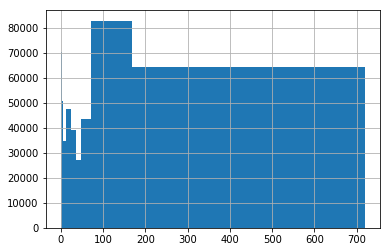

In [170]:
# (target / pd.Timedelta(days=1)).hist(bins=range(0, 100))
# (target / pd.Timedelta(hours=1)).hist(bins=range(240, 1000, 24))
(target / pd.Timedelta(hours=1)).hist(bins=[0, 1, 3, 6, 12, 24, 36, 48, 72, 168, 720])

In [83]:
target.describe()

count                    551375
mean     4 days 05:24:35.886315
std      9 days 02:33:43.731321
min             0 days 00:00:00
25%             0 days 02:43:17
50%             0 days 23:24:46
75%      3 days 19:57:36.500000
max            92 days 05:12:59
dtype: object

In [225]:
df.drop('closed_date', axis=1, inplace=True)

In [ ]:
# pd.set_option('display.max_columns', 1000)
# df.loc[df['complaint_type'] == 'Harboring Bees/Wasps']
# pd.set_option('display.max_columns', 30)

In [226]:
df.info(verbose=True)
# df.info(ver)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551375 entries, 0 to 615603
Data columns (total 826 columns):
address_type                                                object
agency                                                      object
agency_name                                                 object
borough                                                     object
bridge_highway_direction                                    object
bridge_highway_name                                         object
bridge_highway_segment                                      object
city                                                        object
community_board                                             object
complaint_type                                              object
created_date                                                datetime64[ns]
cross_street_1                                              object
cross_street_2                                              object
descripto

In [ ]:
import data_api
import transformers

In [21]:
# df2 = data_api.load_data('data/2017.csv')
# df2.head()

/Users/mike/.envs/nyc311/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (18,20,22,25,50) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


In [23]:
# df2 = transformers.transform_test_and_training(df2)

In [19]:
df2.info(verbose=True)

NameError: name 'df2' is not defined

In [27]:
# pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_columns', 30)
# df2.head()